In [6]:
import sys
import os

# Add the root directory of the project to the path
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..')))

from pyRE.relative_permeability.models import BrooksCoreyRelativePermeability

In [7]:
# Create 2 phase relative permeability model
model = BrooksCoreyRelativePermeability(
    oil_curve=BrooksCoreyRelativePermeability.Curve(
        minimum_saturation=0.2,
        exponent=1.5,
        max_relative_permeability=0.6
    ),
    water_curve=BrooksCoreyRelativePermeability.Curve(
        minimum_saturation=0.2,
        exponent=2.5,
        max_relative_permeability=1.0
    )
)

print(model)

BrooksCoreyRelativePermeability(oil_curve: Curve(minimum_saturation: 0.2, exponent: 1.5, max_relative_permeability: 0.6), gas_curve: None, water_curve: Curve(minimum_saturation: 0.2, exponent: 2.5, max_relative_permeability: 1.0))


In [8]:
# Calculate relative permeabilities at a given saturation
water_saturation = 0.3  # Example saturation
oil_saturation = 1.0 - water_saturation  # Assuming two-phase system

krw = model.calculate_phase_relative_permeability('water', water_saturation)
kro = model.calculate_phase_relative_permeability('oil', oil_saturation)
print(f"Relative permeability of water at {water_saturation} saturation: {krw:.2f}")
print(f"Relative permeability of oil at {oil_saturation} saturation: {kro:.2f}")

Relative permeability of water at 0.3 saturation: 0.01
Relative permeability of oil at 0.7 saturation: 0.46


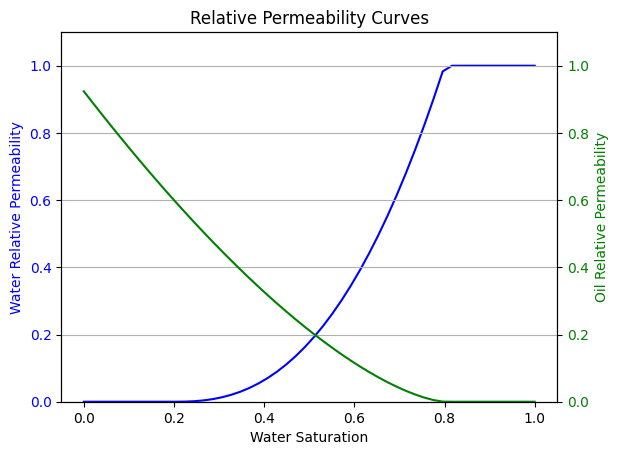

In [9]:
# Create a plot of the relative permeability curves

import numpy as np
import matplotlib.pyplot as plt
water_saturation_range = np.linspace(0, 1, 50)

krw = [model.calculate_phase_relative_permeability('water', sw) for sw in water_saturation_range]
kro = [model.calculate_phase_relative_permeability('oil', 1 - sw) for sw in water_saturation_range]

# Plot relative permeabilities, saturation on x-axis, oil relative permeability on left y-axis and water relative permeability on right y-axis
fig, ax1 = plt.subplots()
ax1.plot(water_saturation_range, krw, 'b-', label='Water Relative Permeability')
ax1.set_xlabel('Water Saturation')
ax1.set_ylabel('Water Relative Permeability', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(0,1.1)
ax2 = ax1.twinx()
ax2.plot(water_saturation_range, kro, 'g-', label='Oil Relative Permeability')
ax2.set_ylabel('Oil Relative Permeability', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0,1.1)
plt.title('Relative Permeability Curves')
plt.grid()
plt.show()